In [ ]:
# setting up the connection between kaggle and colab

In [1]:
pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
mkdir ~/.kaggle

In [4]:
cp kaggle.json ~/.kaggle

In [5]:
! kaggle datasets download -d prasunroy/natural-images

 98% 337M/342M [00:11<00:00, 33.3MB/s]
100% 342M/342M [00:11<00:00, 32.1MB/s]


In [6]:
! unzip natural-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

In [12]:
# import libs

In [7]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers
from keras import optimizers, metrics, models
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

In [ ]:
# setting up the data and spliting it for test and training

In [8]:
data_dir ='./natural_images'
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = keras.preprocessing.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.3,
                                                              subset="training",
                                                              seed=123,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size
                                                            )

Found 6899 files belonging to 8 classes.
Using 4830 files for training.


In [10]:
validation_ds = keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split=0.3,
                                                            subset="validation",
                                                            seed=123,
                                                            image_size=(img_height, img_width),
                                                            batch_size=batch_size
                                                          )

Found 6899 files belonging to 8 classes.
Using 2069 files for validation.


In [11]:
# split the validation ds to val_ds and test_ds
validation_batches = tf.data.experimental.cardinality(validation_ds)
test_ds = validation_ds.take((2*validation_batches)//3)
val_ds = validation_ds.skip((2*validation_batches)//3)

In [12]:
# get class names 
class_names = train_ds.class_names
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [13]:
# first lets train our model using adam for optimization, 10 epochs and relu for activation 
model = Sequential([
  layers.Dense(10, activation='relu'),
  layers.Flatten(),
  layers.Dense(len(class_names))
])

model.compile( optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
151/151 [==============================] - 11s 52ms/step - loss: 2178.6882 - accuracy: 0.5621 - val_loss: 339.4159 - val_accuracy: 0.7114
Epoch 2/10
151/151 [==============================] - 8s 50ms/step - loss: 438.5311 - accuracy: 0.7213 - val_loss: 373.6605 - val_accuracy: 0.7229
Epoch 3/10
151/151 [==============================] - 8s 49ms/step - loss: 334.2832 - accuracy: 0.7627 - val_loss: 351.3123 - val_accuracy: 0.7273
Epoch 4/10
151/151 [==============================] - 8s 50ms/step - loss: 249.6570 - accuracy: 0.7934 - val_loss: 247.6271 - val_accuracy: 0.7619
Epoch 5/10
151/151 [==============================] - 8s 49ms/step - loss: 136.7291 - accuracy: 0.8412 - val_loss: 198.8326 - val_accuracy: 0.7951
Epoch 6/10
151/151 [==============================] - 8s 50ms/step - loss: 113.6850 - accuracy: 0.8518 - val_loss: 333.2200 - val_accuracy: 0.7359
Epoch 7/10
151/151 [==============================] - 8s 50ms/step - loss: 129.6935 - accuracy: 0.8445 - val_loss: 2

In [14]:
# lets see our model acurracy based on what we created above
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Total Loss on Training Set", test_loss)
print("Accuracy of Testing Set: " , test_acc)

43/43 - 2s - loss: 192.6120 - accuracy: 0.7900 - 2s/epoch - 39ms/step
Total Loss on Training Set 192.6119842529297
Accuracy of Testing Set:  0.7899709343910217


Based on this we can see that there is **Overfitting**. We see that there is low accuracy on the testing dataset compare to the training dataset.

---



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180, 180, 10)      40        
                                                                 
 flatten (Flatten)           (None, 324000)            0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2592008   
                                                                 
Total params: 2,592,048
Trainable params: 2,592,048
Non-trainable params: 0
_________________________________________________________________


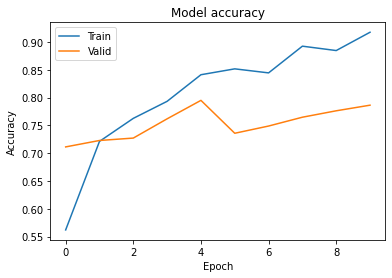

In [16]:
#lets see the graphical representation of the overfitting problem 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

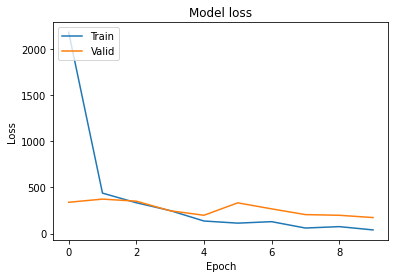

In [17]:
# graphic representation for plot loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


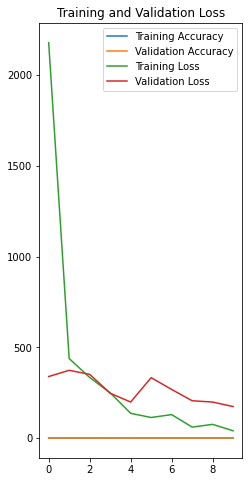

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

To prevent the overfitting, lets add weight regularization and dropout to our model

In [19]:
# improved model to prevent overfitting
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(len(class_names),kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
151/151 [==============================] - 9s 53ms/step - loss: 8.4821 - accuracy: 0.3569 - val_loss: 1.9880 - val_accuracy: 0.6551
Epoch 2/10
151/151 [==============================] - 8s 54ms/step - loss: 2.7894 - accuracy: 0.4460 - val_loss: 1.1612 - val_accuracy: 0.7258
Epoch 3/10
151/151 [==============================] - 8s 53ms/step - loss: 1.8880 - accuracy: 0.4870 - val_loss: 1.1479 - val_accuracy: 0.7489
Epoch 4/10
151/151 [==============================] - 8s 54ms/step - loss: 1.5217 - accuracy: 0.5077 - val_loss: 1.0694 - val_accuracy: 0.7446
Epoch 5/10
151/151 [==============================] - 8s 52ms/step - loss: 1.3940 - accuracy: 0.5205 - val_loss: 0.8818 - val_accuracy: 0.7720
Epoch 6/10
151/151 [==============================] - 8s 52ms/step - loss: 1.3024 - accuracy: 0.5286 - val_loss: 0.7970 - val_accuracy: 0.8182
Epoch 7/10
151/151 [==============================] - 8s 52ms/step - loss: 1.3056 - accuracy: 0.5346 - val_loss: 0.8396 - val_accuracy: 0.8038

In [20]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Total Loss on Training Set", test_loss)
print("Accuracy of Testing Set: " , test_acc)

43/43 - 2s - loss: 0.8815 - accuracy: 0.7892 - 2s/epoch - 39ms/step
Total Loss on Training Set 0.8815445899963379
Accuracy of Testing Set:  0.7892441749572754


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 dense_2 (Dense)             (None, 180, 180, 10)      40        
                                                                 
 dropout (Dropout)           (None, 180, 180, 10)      0         
                                                                 
 flatten_1 (Flatten)         (None, 324000)            0         
                                                                 
 dense_3 (Dense)             (None, 8)                 2592008   
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
Total params: 2,592,048
Trainable params: 2,592,048
No

Here we are facing underfitting : tesing acc >> training acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


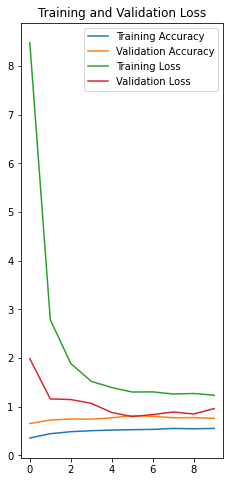

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

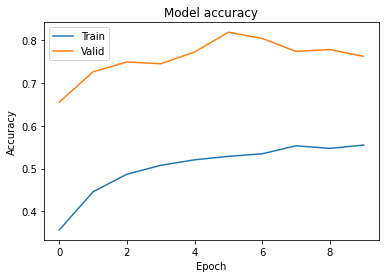

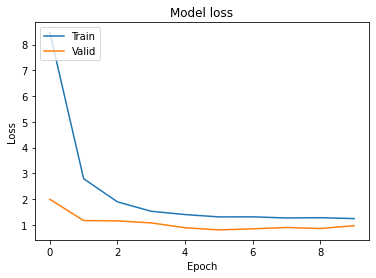

In [23]:
# accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

print("\n\n");

# loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

To resolve the issues, we will add 6 conv2D layers

To Handle underfitting in CNN
 - add more layers 
 - add more neurons in each layer
 - change the layer used previously 

In [24]:
model = models.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu,kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.22), 

    keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.4),  

    keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.5), 

    keras.layers.Conv2D(1024, (3, 3), padding='same', activation=keras.activations.relu, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis = 1),
    keras.layers.Dropout(0.5), 

    keras.layers.Flatten(), 
    keras.layers.Dense(8, activation=keras.activations.softmax)
    ])
                        
model.compile(
              optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


151/151 [==============================] - 23s 96ms/step - loss: 3.6180 - accuracy: 0.4021 - val_loss: 6.6316 - val_accuracy: 0.4156
Epoch 2/50
151/151 [==============================] - 13s 81ms/step - loss: 2.5348 - accuracy: 0.5756 - val_loss: 2.1957 - val_accuracy: 0.6263
Epoch 3/50
151/151 [==============================] - 13s 81ms/step - loss: 2.0057 - accuracy: 0.6692 - val_loss: 1.9716 - val_accuracy: 0.6854
Epoch 4/50
151/151 [==============================] - 13s 81ms/step - loss: 1.7241 - accuracy: 0.7236 - val_loss: 1.7396 - val_accuracy: 0.6999
Epoch 5/50
151/151 [==============================] - 12s 81ms/step - loss: 1.4170 - accuracy: 0.7905 - val_loss: 1.3801 - val_accuracy: 0.7734
Epoch 6/50
151/151 [==============================] - 12s 81ms/step - loss: 1.2510 - accuracy: 0.8170 - val_loss: 1.2019 - val_accuracy: 0.8167
Epoch 7/50
151/151 [==============================] - 13s 81ms/step - loss: 1.2016 - accuracy: 0.8253 - val_loss: 1.0714 - val_accuracy: 0.8413
Epo

**Evaluate**

In [25]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Total Loss on Training Set", test_loss)
print("Accuracy of Testing Set: " , test_acc)

43/43 - 2s - loss: 0.6557 - accuracy: 0.9237 - 2s/epoch - 40ms/step
Total Loss on Training Set 0.6556807160377502
Accuracy of Testing Set:  0.9236918687820435


Lets see the graph for our final model test and training accuracy, loss

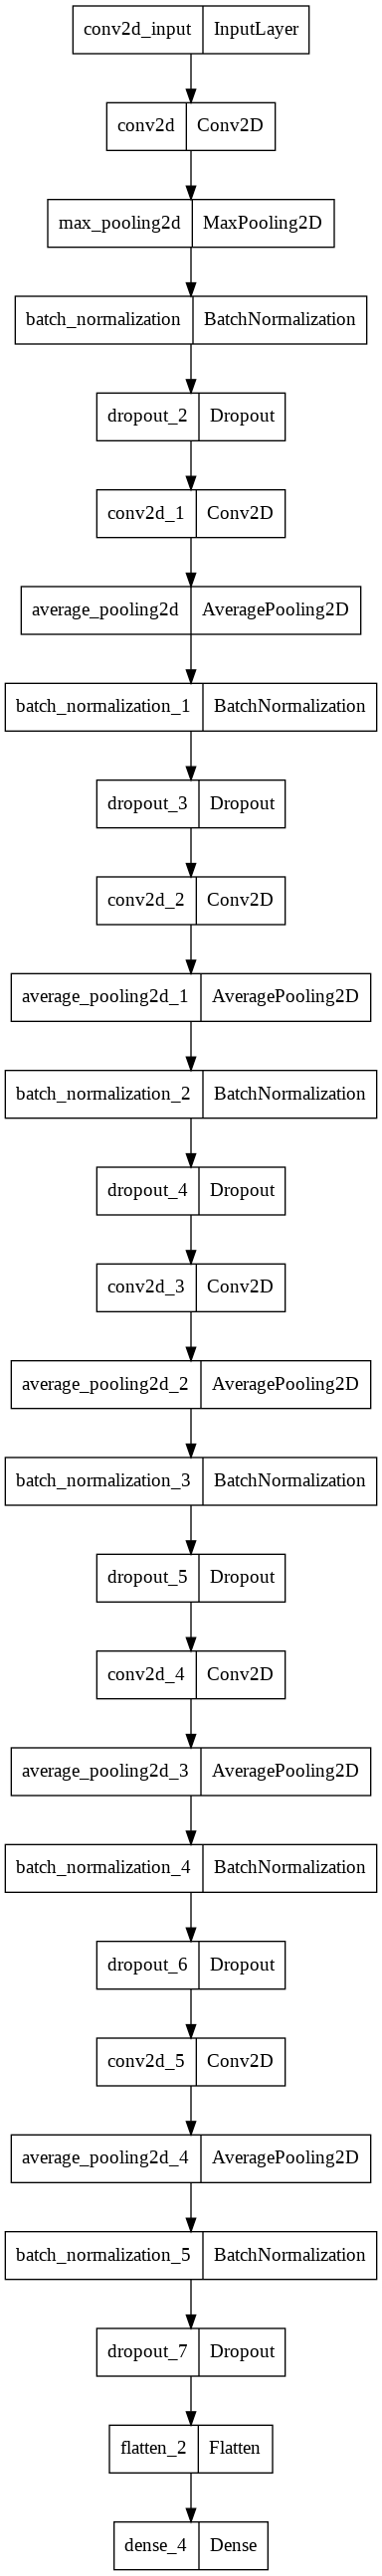

In [26]:
model_img = 'model.png'
keras.utils.plot_model(model, to_file = model_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


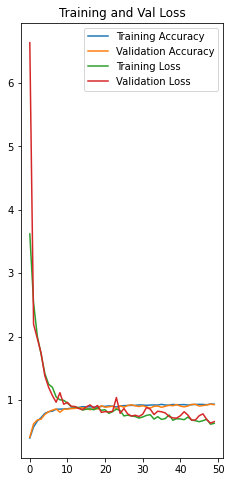

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy')

plt.subplot(1, 2, 1)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss')
plt.show()

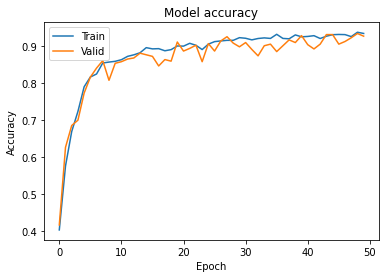

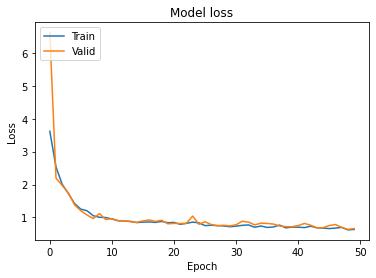

In [28]:
#accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 423ms/step
Predicted Name:  airplane
Accuracy:  99.28


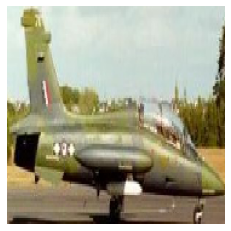

In [34]:
from keras.utils.image_utils import load_img
import numpy as np

image_path = 'airplane.jpeg'
image = load_img(image_path, target_size=(180,180))

frame = np.asarray(image)
frame = np.expand_dims(frame, axis=0)
result = model.predict(frame)

dic_res = {}
for i in range(8):
  dic_res[result[0][i]] = class_names[i]

res = result[0]
res.sort()
res = res[::-1]
prob = res[:3]

prob_res = []
class_res = []

for i in range(3):
  prob_res.append((prob[i]*100).round(2))
  class_res.append(dic_res[prob[i]])

print("Predicted Name: ", class_res[0])
print("Accuracy: ", prob_res[0])
plt.imshow(image, cmap="binary")
plt.axis('off')
plt.show()